In [5]:
%pylab inline
import cosmology
import scipy.special as spfun
import galsim
import astropy.io.fits as pyfits
import haloSim

figMsDir='/work/xiangchong.li/superonionGW/code/massMap_Private/doc/paper_ms_method_HSCY1/'

Populating the interactive namespace from numpy and matplotlib


+ haloSim
    + Compare WB00 with Galsim
    + Compare WB00 with TJ03 
    + Test the mass estimation for TJ03


+ haloAtom
    + Show halo atom of CS02
    + Compare CS02 with TJ03 with Gaussian Smoothing Kernel


+ Reference
    + [WB00](https://ui.adsabs.harvard.edu/abs/1999astro.ph..8213O) :Tangential Shear of untruncated NFW halo
    + [CS02](https://ui.adsabs.harvard.edu/abs/2002PhR...372....1C/): Tangential Shear of truncated NFW halo (Fourier Space)
    + [TJ03](https://ui.adsabs.harvard.edu/abs/2003MNRAS.344..857T/): Tangential Shear of truncated NFW halo (Real Space)

# haloSim

## WB00 vs Galsim

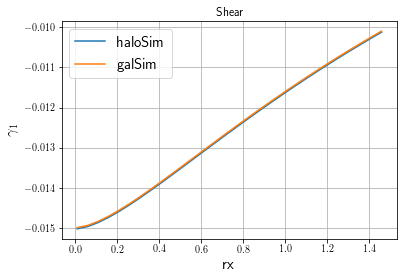

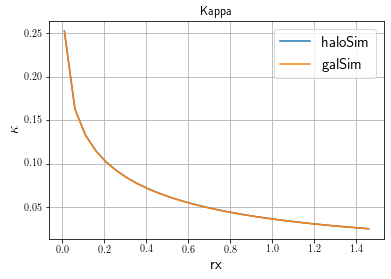

In [17]:
halo=haloSim.nfw_lensWB00(mass=1e15,conc=0.1,redshift=0.3,ra=0.,dec=0.)
pos_cl  =   galsim.PositionD(0.,0.)
haloGS  =   galsim.nfw_halo.NFWHalo(mass= 1e15,
            conc=0.1, redshift= 0.3,
            halo_pos=pos_cl ,omega_m= 0.3,
            omega_lam= 0.7)
kappalist=[]
shearlist=[]
kappaGSlist=[]
shearGSlist=[]
rlist=np.arange(0.01,1.5,0.05)
for ratio in rlist:
    kappa=halo.lensKernel(2.)*halo.Sigma(2000.*ratio,1000.*ratio)
    shear=halo.lensKernel(2.)*halo.DeltaSigmaComplex(2000.*ratio,1000.*ratio)
    kappalist.append(kappa)
    shearlist.append(shear.real)
    kappaGS=haloGS.getConvergence(pos=(2000.*ratio,1000.*ratio),z_s=np.ones(1)*2.,units = "arcsec")
    shearGS=haloGS.getShear(pos=(2000.*ratio,1000.*ratio),z_s=np.ones(1)*2.,units = "arcsec",reduced=False)
    kappaGSlist.append(kappaGS)
    shearGSlist.append(shearGS[0])
plt.figure()
plt.plot(rlist,shearlist,label='haloSim')
plt.plot(rlist,shearGSlist,label='galSim')
plt.xlabel('rx',fontsize=15)
plt.ylabel(r'$\gamma_1$',fontsize=15)
plt.title('Shear')
plt.grid()
plt.legend(fontsize=15)

plt.figure()
plt.plot(rlist,kappalist,label='haloSim')
plt.plot(rlist,kappaGSlist,label='galSim')
plt.xlabel('rx',fontsize=15)
plt.ylabel(r'$\kappa$',fontsize=15)
plt.title('Kappa')
plt.grid()
plt.legend(fontsize=15)

## WB00 vs. TJ03
Galsim uses WB00 NFW lensing mdoel

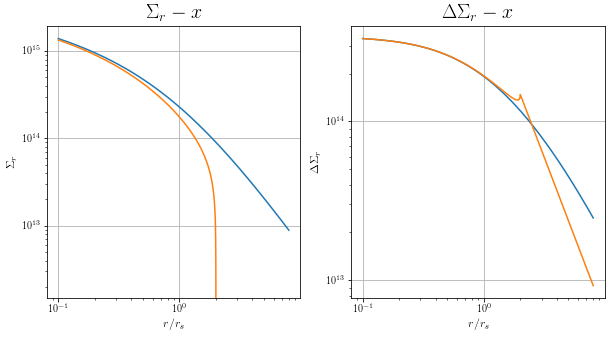

In [3]:
halo1=haloSim.nfw_lensWB00(mass=1e15,conc=2.,redshift=0.3,ra=0.,dec=0.)
halo2=haloSim.nfw_lensTJ03(mass=1e15,conc=2.,redshift=0.3,ra=0.,dec=0.)
x=np.linspace(0.1,8.,3000)
y=np.zeros(3000)
DeltaSigma1=halo1.DeltaSigma(x*halo1.rs_arcsec,y*halo1.rs_arcsec)
Sigma1=halo1.Sigma(x*halo1.rs_arcsec,y*halo1.rs_arcsec)
DeltaSigma2=halo2.DeltaSigma(x*halo2.rs_arcsec,y*halo2.rs_arcsec)
Sigma2=halo2.Sigma(x*halo2.rs_arcsec,y*halo2.rs_arcsec)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,2,1)
ax.loglog(x,Sigma1)
ax.loglog(x,Sigma2)
ax.grid()
ax.set_title(r'$ \Sigma_r - x$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=12)
ax.set_ylabel(r'$ \Sigma_r$',fontsize=12)

ax=fig.add_subplot(1,2,2)
ax.loglog(x,DeltaSigma1)
ax.loglog(x,DeltaSigma2)
ax.grid()
ax.set_title(r'$\Delta \Sigma_r - x$',fontsize=20)
ax.set_xlabel(r'$r/r_s$',fontsize=12)
ax.set_ylabel(r'$\Delta \Sigma_r$',fontsize=12)

## Test Mass Estimation for TJ03

In [218]:
halo2=haloSim.nfw_lensTJ03(mass=7e+14,conc=2.,redshift=0.3,ra=0.,dec=0.)
x=np.linspace(0.01,5.,5000)
y=np.zeros(5000)
Sigma2=halo2.Sigma(x*halo2.rs_arcsec,y*halo2.rs_arcsec)
print('relative mass bias is: %.3f' %((2*np.pi*np.sum(Sigma2*x)*halo2.rs**2.*(x[1]-x[0])-7e+14)/7e+14) )

relative mass bias is: 0.006


# haloAtom
## Smoothed Basis Atom (CS02)

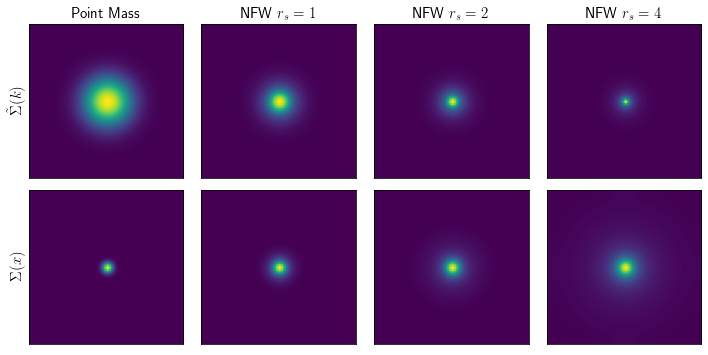

In [4]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(2,4,1)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_ylabel(r'$\tilde{\Sigma}(k)$',fontsize=15)
ax.set_title('Point Mass',fontsize=15)
atomF=np.fft.fftshift(haloSim.GausAtom(sigma=1.5,ngrid=64,fou=True))
ax.imshow(atomF)

ax=fig.add_subplot(2,4,2)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_title(r'NFW $r_s=1$',fontsize=15)
atomF=np.fft.fftshift(haloSim.haloCS02SigmaAtom(r_s=1.,ngrid=64,c=9.,smooth_scale=1.5))
ax.imshow(atomF)

ax=fig.add_subplot(2,4,3)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_title(r'NFW $r_s=2$',fontsize=15)
atomF=np.fft.fftshift(haloSim.haloCS02SigmaAtom(r_s=2.,ngrid=64,c=9.,smooth_scale=1.5))
ax.imshow(atomF)

ax=fig.add_subplot(2,4,4)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_title(r'NFW $r_s=4$',fontsize=15)
atomF=np.fft.fftshift(haloSim.haloCS02SigmaAtom(r_s=4.,ngrid=64,c=9.,smooth_scale=1.5))
ax.imshow(atomF)


ax=fig.add_subplot(2,4,5)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_ylabel(r'$\Sigma(x)$',fontsize=15)
atomF=np.fft.fftshift(haloSim.GausAtom(sigma=1.5,ngrid=64,fou=False))
ax.imshow(atomF)

ax=fig.add_subplot(2,4,6)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
atomF=np.fft.fftshift(haloSim.haloCS02SigmaAtom(r_s=1.,ngrid=64,c=9.,smooth_scale=1.5,fou=False))
ax.imshow(atomF)

ax=fig.add_subplot(2,4,7)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
atomF=np.fft.fftshift(haloSim.haloCS02SigmaAtom(r_s=2.,ngrid=64,c=9.,smooth_scale=1.5,fou=False))
ax.imshow(atomF)

ax=fig.add_subplot(2,4,8)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
atomF=np.fft.fftshift(haloSim.haloCS02SigmaAtom(r_s=4.,ngrid=64,c=9.,smooth_scale=1.5,fou=False))
ax.imshow(atomF)
plt.tight_layout()

plt.savefig(os.path.join(figMsDir,'detfalseRate_f3-3.pdf'))

## Radius profile of $\tilde{\Sigma}_{\rm{nfw}}$

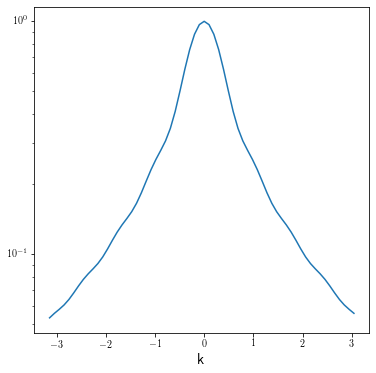

In [59]:
deltax=1.
ngrid=64
r_s=1.
c=9.
karray=np.fft.fftfreq(ngrid)*2.*np.pi/deltax

import scipy.special as spfun
A= 1./(np.log(1+c)-c/(1.+c))
r=np.absolute(karray)*r_s
mask=r>0.001
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
atomFou=np.zeros_like(r, dtype=float)
r1=r[mask]
si1,ci1=spfun.sici((1+c)*r1)
si2,ci2=spfun.sici(r1)
atomFou[mask]=A*(np.sin(r1)*(si1-si2)-np.sin(c*r1)/(1+c)/r1+np.cos(r1)*(ci1-ci2))
r0=r[~mask]
atomFou[~mask]=1.+A*(c+c**3/(6*(1 + c))+1/4.*(-2.*c-c**2.-2*np.log(1+c)))*r0**2.
ax.plot(np.fft.fftshift(karray),np.fft.fftshift(atomFou))
ax.set_xlabel('k',fontsize=15)
ax.set_yscale('log')

## Smoothing and Sampling
### Tophat filter
$$H(x)=1/L ~ (-\frac{L}{2}\leq x \lt \frac{L}{2})$$
$$\tilde{H}(k)=\frac{1}{L}\int_{-\frac{L}{2}}^{\frac{L}{2}} \exp(-ikx) dx$$
$$\tilde{H}(k)=\frac{\sin(Lk/2)}{Lk/2}$$

0.9999999999999999


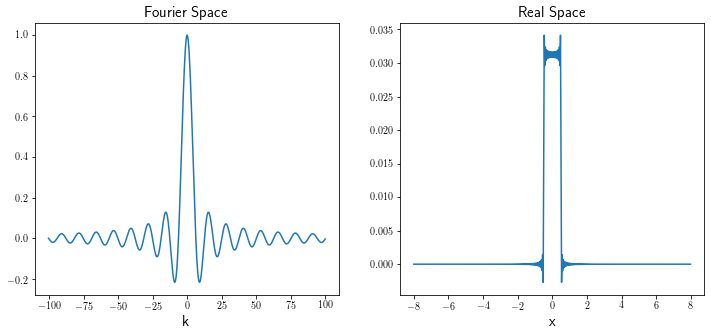

In [3]:
deltax=1./32.
ngrid=512
L=1

fig=plt.figure(figsize=(12,5))
karray=np.fft.fftfreq(ngrid)*2.*np.pi/deltax
sinc=np.ones(len(karray))
sinc[1:]=np.sin(L/2.*karray[1:])/L*2./karray[1:]
ax=fig.add_subplot(1,2,1)
ax.plot(np.fft.fftshift(karray),np.fft.fftshift(sinc))
ax.set_xlabel('k',fontsize=15)
ax.set_title('Fourier Space',fontsize=15)
xarray=np.fft.fftfreq(ngrid)*ngrid*deltax
tophat=np.fft.ifft(sinc).real
ax=fig.add_subplot(1,2,2)
ax.plot(np.fft.fftshift(xarray),np.fft.fftshift(tophat))
ax.set_xlabel('x',fontsize=15)
ax.set_title('Real Space',fontsize=15)
print(sum(tophat))

### Gaussian Filter
$$G(x)=\frac{1}{2\pi \sigma} \exp(x^2/2\sigma^2)$$
$$\tilde{G}(k)=\exp(k^2\sigma^2/2)$$

1.0000000000000002 25.489034309742635


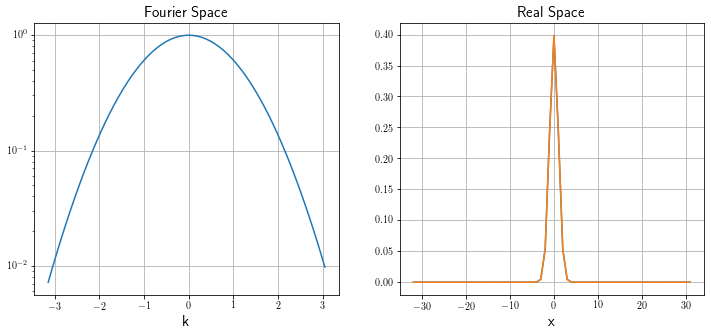

In [96]:
deltax=1.
ngrid=64
sigma=1.

fig=plt.figure(figsize=(12,5))
karray=np.fft.fftfreq(ngrid)*2.*np.pi/deltax
gauFou=np.exp(-(karray*sigma)**2./2.)

ax=fig.add_subplot(1,2,1)
ax.plot(np.fft.fftshift(karray),np.fft.fftshift(gauFou))
ax.set_xlabel('k',fontsize=15)
ax.set_title('Fourier Space',fontsize=15)
ax.set_yscale('log')
plt.grid()

xarray=np.fft.fftfreq(ngrid)*ngrid*deltax
gauReal=np.fft.ifft(gauFou).real

gauReal2=1./np.sqrt(2.*np.pi)/sigma*np.exp(-(xarray/sigma)**2./2.)

ax=fig.add_subplot(1,2,2)
ax.plot(np.fft.fftshift(xarray),np.fft.fftshift(gauReal))
ax.plot(np.fft.fftshift(xarray),np.fft.fftshift(gauReal2)*deltax)
ax.set_xlabel('x',fontsize=15)
ax.set_title('Real Space',fontsize=15)
#ax.set_yscale('log')
plt.grid()
print(sum(gauReal),sum(gauFou))

## Compare CS02 with TJ03
### Sampling

Text(0, 0.5, 'dec [arcmin]')

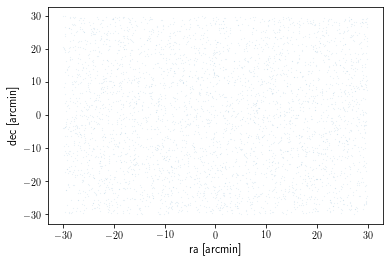

In [187]:
perArcmin=1
delta=1
ntot=perArcmin*60*60
x=np.random.rand(ntot)*60-30
y=np.random.rand(ntot)*60-30
xgrid=np.arange(-32,33,delta)-0.5
ygrid=np.arange(-32,33,delta)-0.5
xcgrid=(xgrid[:-1]+xgrid[1:])/2.
ycgrid=(ygrid[:-1]+ygrid[1:])/2.
nx=len(xcgrid)
ny=len(ycgrid)
xbin=np.int_((x-xgrid[0])/delta)
ybin=np.int_((y-ygrid[0])/delta)
plt.scatter(x,y,s=0.001)
plt.xlabel('ra [arcmin]',fontsize=12)
plt.ylabel('dec [arcmin]',fontsize=12)

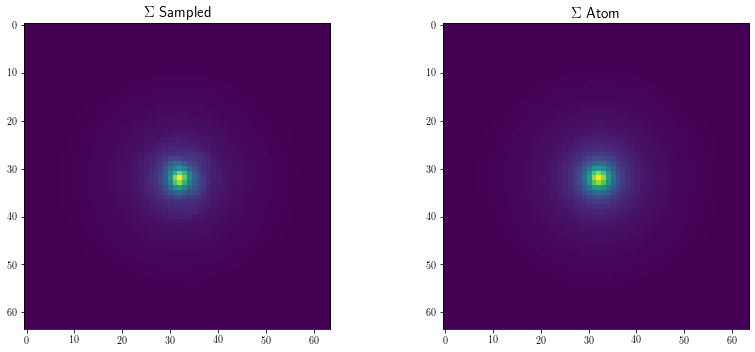

In [210]:
# Use nfw_lensTJ03 to simulate Simga map in Real space
# rs= n_rs (pix)
sigma=1.
n_rs=3. #pix
halo=haloSim.nfw_lensTJ03(mass=1,conc=9.,redshift=0.1,ra=0.,dec=0.)
SigmaArray=halo.Sigma(x*halo.rs_arcsec/n_rs,y*halo.rs_arcsec/n_rs)
SigmaGrid=np.zeros((ny,nx))

for iy in range(ny):
    for ix in range(nx):
        xc=xcgrid[ix]
        yc=ycgrid[iy]
        ind=np.where((xbin>=ix-3)&(xbin<=ix+3)& \
            (ybin>=iy-3)&(ybin<=iy+3))[0]
        rl2=(x[ind]-xc)**2.+(y[ind]-yc)**2.
        wl=1./np.sqrt(2.*np.pi)/sigma*np.exp(-rl2/sigma**2./2.)
        wsum=np.sum(wl)
        if wsum>0.1:
            ss=SigmaArray[ind]
            SigmaGrid[iy,ix]=np.sum(wl*ss)/wsum
norm=np.sum(SigmaGrid)
SigmaGrid/=norm


SigmaAtom=np.fft.fftshift(haloSim.haloCS02SigmaAtom(r_s=3.,ngrid=64,c=9.,smooth_scale=1.01,fou=False))
norm=np.sum(SigmaAtom)
SigmaAtom/=norm

fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,2,1)
ax.imshow(SigmaGrid)
ax.set_title(r'$\Sigma$ Sampled',fontsize=15)

ax=fig.add_subplot(1,2,2)
ax.imshow(SigmaAtom)
ax.set_title(r'$\Sigma$ Atom',fontsize=15)
plt.tight_layout()

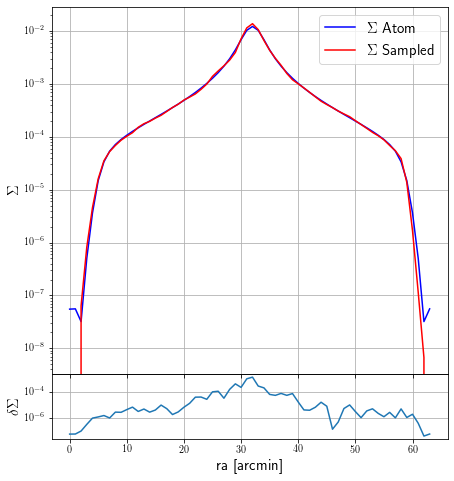

In [206]:
icol=32
fig=plt.figure(figsize=(5.5,6.))
ax = fig.add_axes([0, 0, 1, 0.15])
ax.plot(np.absolute(SigmaAtom-SigmaGrid)[icol])
ax.set_xlabel('ra [arcmin]',fontsize=15)
ax.set_ylabel(r'$\delta\Sigma$',fontsize=15)
ax.set_yscale('log')
plt.grid()
ax = fig.add_axes([0, 0.15, 1, 0.85])
ax.plot(np.absolute(SigmaAtom)[icol],c='blue',label=r'$\Sigma$ Atom')
ax.plot(np.absolute(SigmaGrid)[icol],c='red',label=r'$\Sigma$ Sampled')
ax.set_ylabel(r'$\Sigma$',fontsize=15)
ax.set_xticklabels([])
ax.set_yscale('log')
plt.legend(fontsize=15)
plt.grid()